In [1]:
import tensorflow as tf
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import math
from resnet_model import *

In [2]:
# def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):    
cifar10_dir = './cifar-10-batches-py'
X_train,y_train,X_test,y_test = get_data(cifar10_dir)

(32, 32, 3)
6


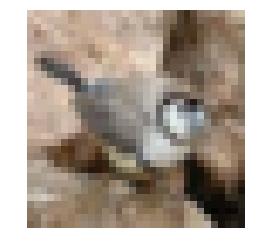

In [3]:
print(X_train[0].shape)
print(y_train[0])
first_img = X_train[90]
def show_one_img(img):
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    plt.show()
# show_one_img(first_img)
plt.imshow(first_img.astype('uint8'))
plt.axis('off')
plt.show()

In [3]:
num_training=49000
num_validation=1000
num_test=1000
_BATCH_NORM_DECAY = 0.997
_BATCH_NORM_EPSILON = 1e-5

# subsample the data
# data format [N,W,H,C]
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
# X_dev -= mean_image

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

('Train data shape: ', (49000, 32, 32, 3))
('Train labels shape: ', (49000,))
('Validation data shape: ', (1000, 32, 32, 3))
('Validation labels shape: ', (1000,))
('Test data shape: ', (1000, 32, 32, 3))
('Test labels shape: ', (1000,))


In [4]:
### tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None,])
# print(y.shape)
is_training = tf.placeholder(tf.bool)

learning_rate = 0.5
cla_score = my_resnet(X, is_training=True, resnet_size=20, num_classes=10, data_format='channels_last')
# print(cla_score)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=cla_score, labels=tf.one_hot(y,10)))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predict_y = y
is_correct = tf.argmax(cla_score,axis = 1)
is_correct = tf.equal(is_correct, tf.cast(predict_y, tf.int64))
# is_correct = tf.reduce_mean(is_correct)
is_correct = tf.cast(is_correct, tf.float32)
accuracy = tf.reduce_mean(is_correct)
# accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# accuracy = tf.reduce_mean(tf.cast(tf.argmax(cla_score,axis = 1) == y, tf.float32))

In [5]:
train_indicies = np.arange(X_train.shape[0])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    batch_size = 100
    train_epochs = 5

    for epoch in range(train_epochs):
        avg_cost = 0
        total_batch = int(math.ceil(X_train.shape[0]/batch_size))
        for i in range(total_batch):
            start_idx = (i*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
#             print(X_train[idx,:].shape)
#             print(y_train[idx])
#             break
            feed_dict = {X: X_train[idx,:],y: y_train[idx]}
            c,_ = sess.run([cost, optimizer], feed_dict=feed_dict)
# #             avg_cost += c / total_batch
            if i%100 == 0:
#                 is_correct = sess.run(accuracy, feed_dict=feed_dict)
#                 print(y_train[idx])
#                 print(is_correct)
#                 print(np.argmax(train_acc,axis=1))
#                 break
                print("epoch:%d,cost:%f"%(epoch, c))
#                 print("epoch:%d,cost:%f,train_acc:%f"%(epoch, c, is_correct))

epoch:0,cost:2.415462
epoch:0,cost:2.327487
epoch:0,cost:2.347136
epoch:0,cost:2.349035
epoch:0,cost:2.298084
epoch:1,cost:2.321191
epoch:1,cost:2.332924
epoch:1,cost:2.342546
epoch:1,cost:2.351936
epoch:1,cost:2.299914
epoch:2,cost:2.322599
epoch:2,cost:2.332692
epoch:2,cost:2.343432
epoch:2,cost:2.353025
epoch:2,cost:2.300378
epoch:3,cost:2.323079
epoch:3,cost:2.332561
epoch:3,cost:2.343930
epoch:3,cost:2.353434
epoch:3,cost:2.300545
epoch:4,cost:2.323275
epoch:4,cost:2.332486
epoch:4,cost:2.344161
epoch:4,cost:2.353606
epoch:4,cost:2.300618
